
Start time:  2024-09-23 15:35:31.396302

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 1 
  Done; cell creation time = 0.06 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
Recording 7 traces of 7 types on node 0
Plotting 3D cell shape ...


Running simulation using NEURON for 550.9 ms...
  Done; run time = 20.17 s; real-time ratio: 0.03.

Gathering data...
  Done; gather time = 0.05 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 2 (3.63 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 20.17 s
Plotting recorded cell traces ... cell
  Done; plotting time = 0.04 s

Total time = 21.17 s
Plotting recorded cell traces ... cell


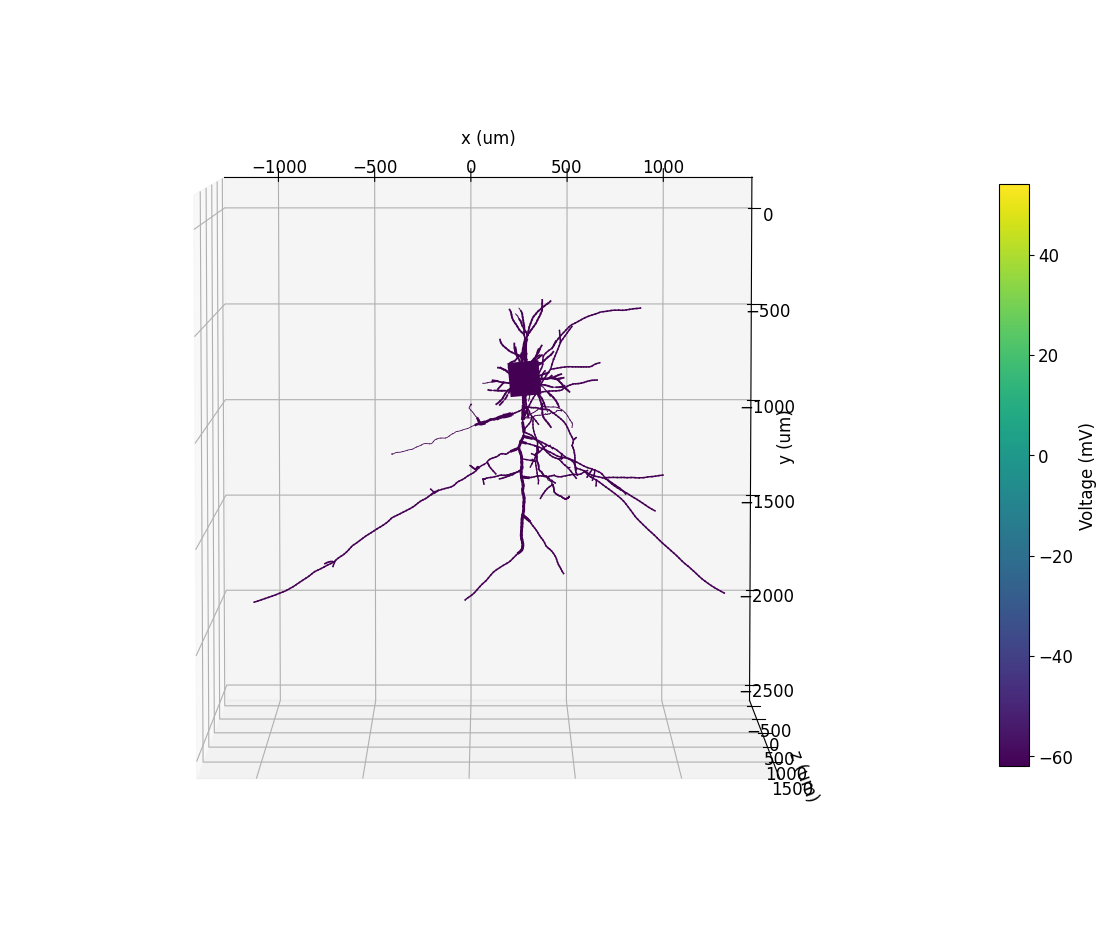

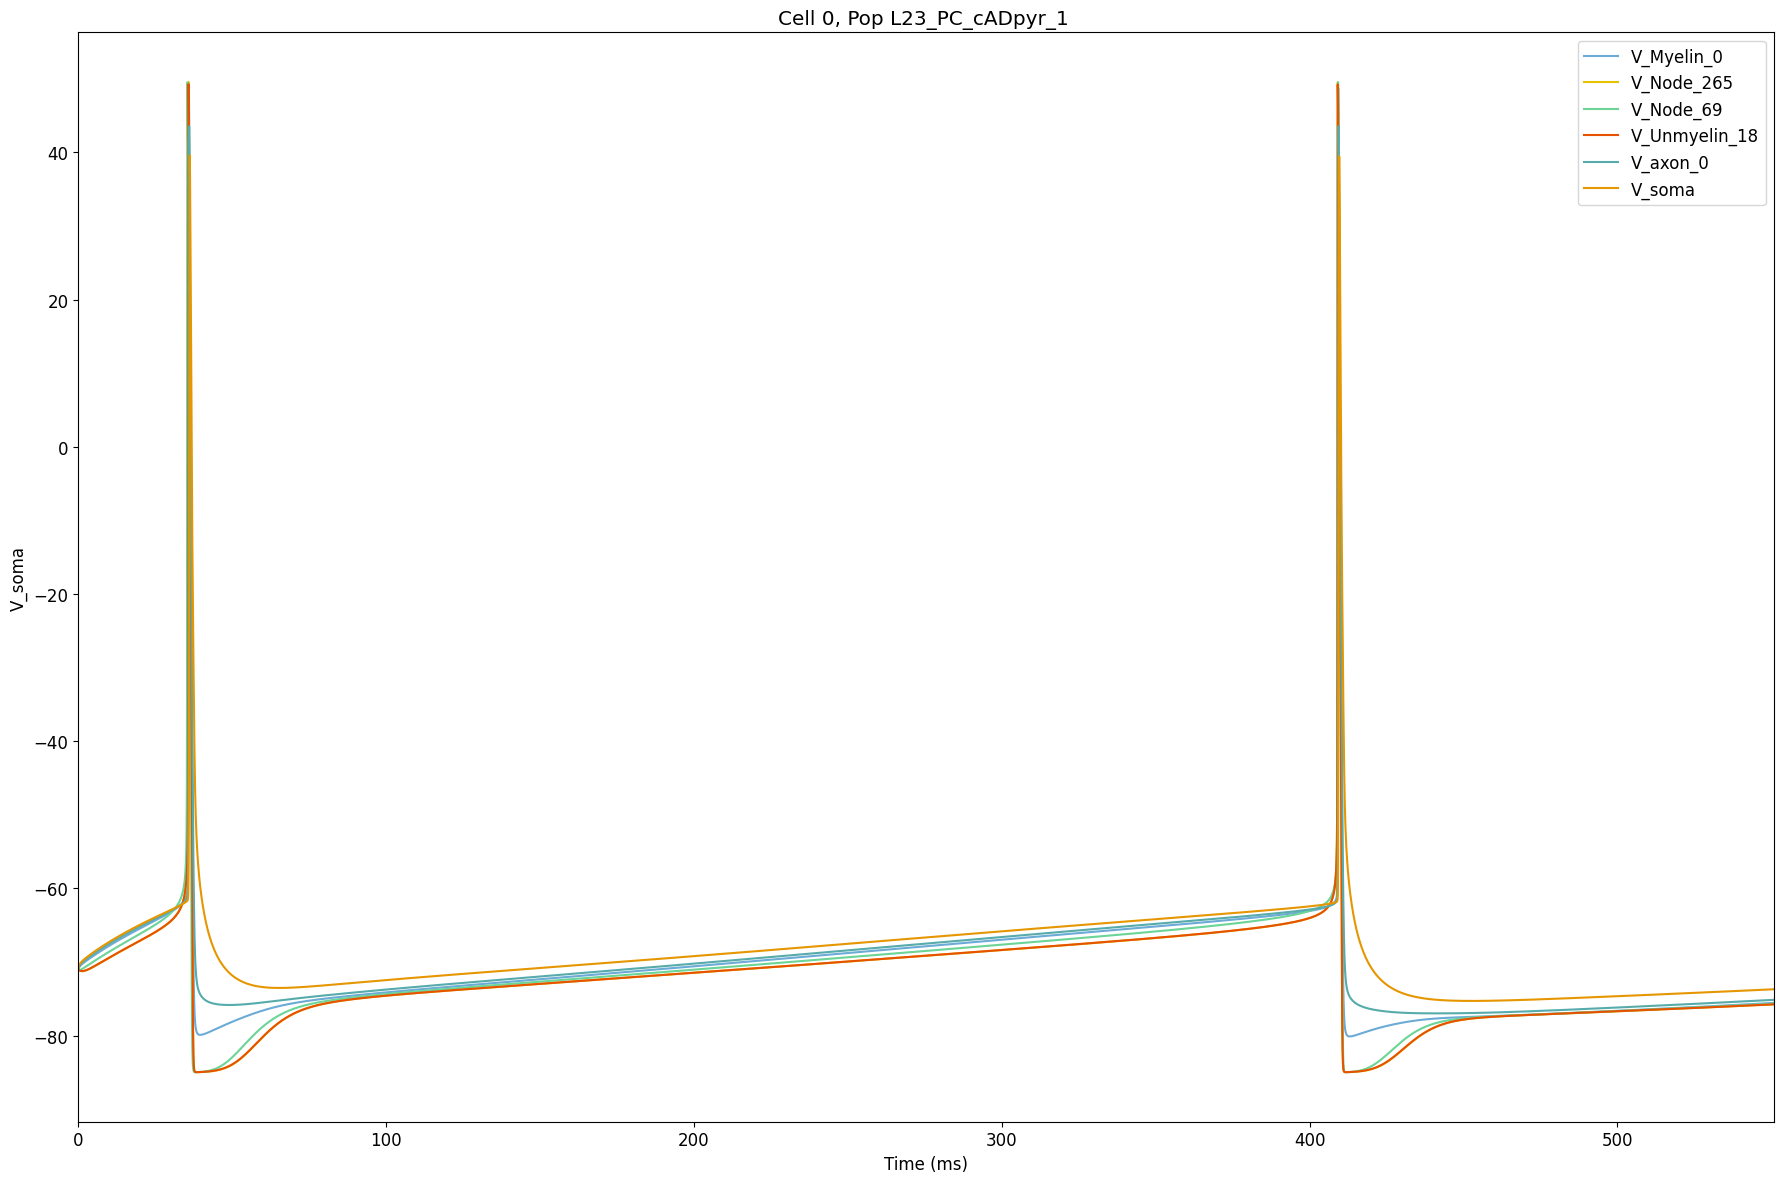

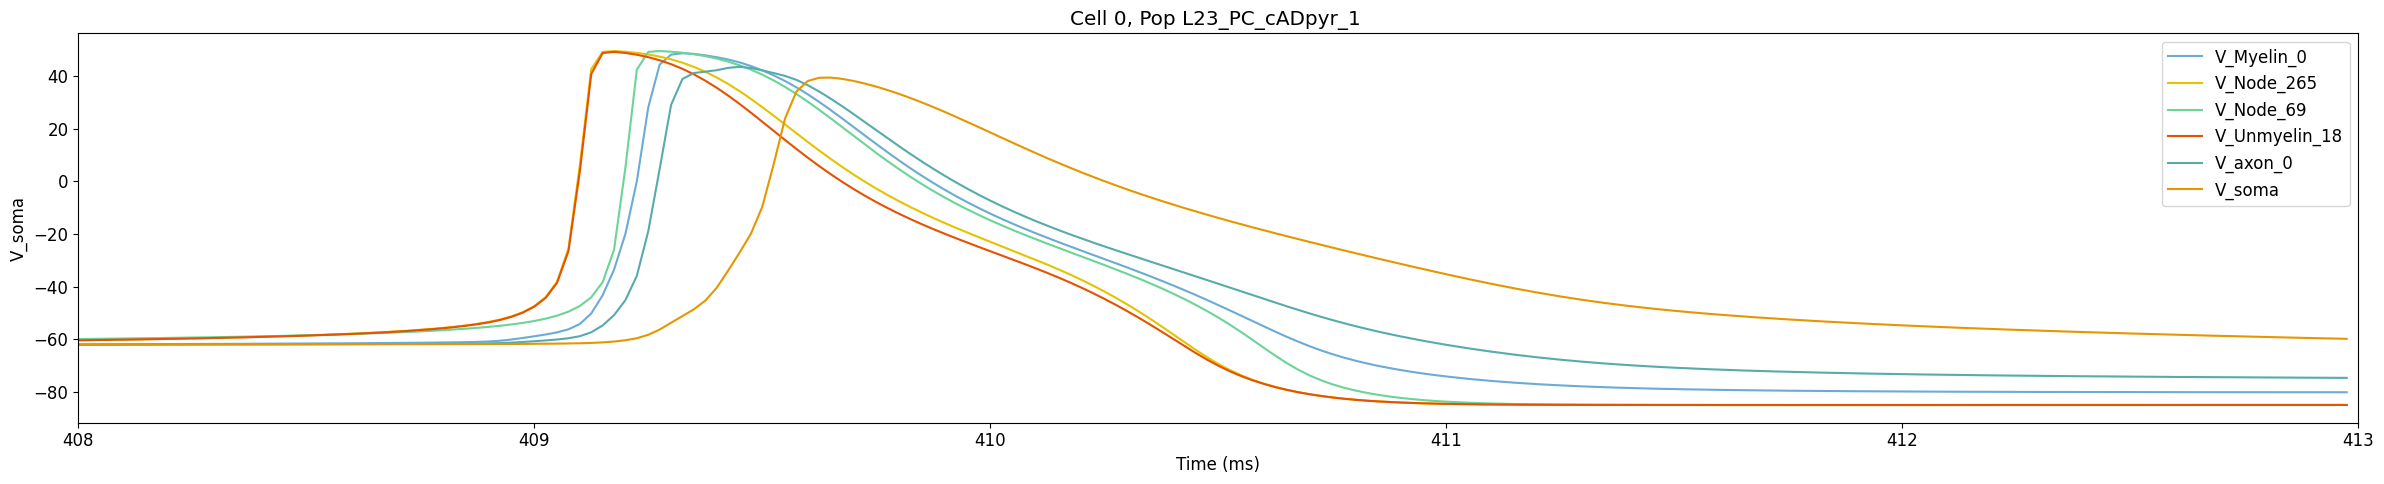

In [85]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""
# import matplotlib
import neuron
from netpyne import specs, sim
import os
from copy import deepcopy

%matplotlib inline

cfg_base = specs.SimConfig()  

cfg_base.duration = 5.0*1e3 ## Duration of the sim, in ms  
cfg_base.dt = 0.025
cfg_base.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg_base.hParams = {'celsius': 34, 'v_init': -71}  
cfg_base.verbose = False
cfg_base.createNEURONObj = True
cfg_base.createPyStruct = True  

cells = [
    #"L1_NGC_DA_bNAC",
    "L23_PC_cADpyr", # L23_PC_cADpyr_1_cellParams.json
    #"L4_LBC_cACint",
    # "L5_TTPC2_cADpyr",
    #"L6_TPC_L1_cADpyr",
]
cell_ID = 1 # 1 through 5
cellNames = [f"{cell}_{cell_ID}" for cell in cells]

# Network parameters
netParams_base = specs.NetParams()  # object of class NetParams to store the network parameters

netParams_base.scale = 1.0 # Scale factor for number of cells
netParams_base.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams_base.sizeY = 1082.0 # y-dimension (vertical height or cortical depth) size in um
netParams_base.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams_base.shape = 'cylinder' # cylindrical (column-like) volume

holding_current, step1_current, step2_current, step3_current, step4_current = -0.1, 0.1, 0.2, 0.4, 0.8
durationstim = 500
delaystim = 500
timesimulation = 1000

currents = [
    # 0.05,
    0.2,
    # 0.1,
    # 0.8,
    # 0.8,
]

plotshape_Video = 0

# Try to narrow down to ~5 ms
recordStarts = [
    # 328, # L1_NGC_DA_bNAC_1 @ 0.05 nA
    408, # L23_PC_cADpyr_1 @ 0.2 nA
    # 298, # L4_LBC_cACint_1 @ 0.1 nA
    # 434, # L5_TTPC2_cADpyr_1 @ 0.8 nA
    # 262, # L6_TPC_L1_cADpyr_1 @ 0.8 nA
    # 343, # L5_TTPC2_cADpyr_5 @ 0.8 nA
]
if plotshape_Video:
    record_Time = 5
else:
    record_Time = 5

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfgs = [deepcopy(cfg_base) for cell in cells]
netParams_s = [deepcopy(netParams_base) for cell in cells]
print(cfgs)
print(netParams_s)

for cellName, cfg, netParams, recordStart, current in zip(cellNames, cfgs, netParams_s, recordStarts, currents):
    #cellName = 'L23_PC_cADpyr_1' # L23_PC_cADpyr_1_cellParams.json

    cfg.allpops = [cellName]

    cfg.recordCells = cfg.allpops # record all cells                 
    cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                        'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                        'V_Myelin_0': {'sec':'Myelin_0', 'loc':0.5, 'var':'v'},
                        # 'V_Myelin_1': {'sec':'Myelin_1', 'loc':0.5, 'var':'v'},
                        # 'V_Myelin_10': {'sec':'Myelin_10', 'loc':0.5, 'var':'v'},
                        # 'V_Node_0': {'sec':'Node_0', 'loc':0.5, 'var':'v'},
                        # 'V_Node_1': {'sec':'Node_1', 'loc':0.5, 'var':'v'},
                        # 'V_Node_10': {'sec':'Node_10', 'loc':0.5, 'var':'v'},
                        # 'V_Unmyelin_0': {'sec':'Unmyelin_0', 'loc':0.5, 'var':'v'},
                        # 'V_Unmyelin_10': {'sec':'Unmyelin_10', 'loc':0.5, 'var':'v'},
                        # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                        # 'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
                        # 'V_apic_95': {'sec':'apic_95', 'loc':0.5, 'var':'v'},                
                        # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
                        # 'V_dend_65': {'sec':'dend_65', 'loc':0.5, 'var':'v'},
                        'V_Node_69': {'sec':'Node_69', 'loc':0.5, 'var':'v'},
                        # 'V_Myelin_69': {'sec':'Myelin_69', 'loc':0.5, 'var':'v'},
                        'V_Node_265': {'sec':'Node_265', 'loc':0.5, 'var':'v'},
                        'V_Unmyelin_18': {'sec':'Unmyelin_18', 'loc':0.5, 'var':'v'},
                        }

    cfg.recordStim = True
    cfg.recordTime = True
    cfg.recordStep = 0.025  

    cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'saveFig': False, 'showFig': False, 'figSize':(18,12)} #'timeRange': [2000,cfg.duration], 

    #------------------------------------------------------------------------------
    # Saving
    #------------------------------------------------------------------------------
    cfg.simLabel = cellName
    cfg.saveFolder = '../data/severalCellstest/'+cfg.simLabel
    cfg.savePickle = False         	## Save pkl file
    cfg.saveJson = False	           	## Save json file
    cfg.saveDataInclude = ['simData'] ## , 'netParams', 'simConfig', ,'simData'
    cfg.backupCfgFile = None
    cfg.gatherOnlySimData = False
    cfg.saveCellSecs = True
    cfg.saveCellConns = True

    # r = 210 um and hexagonal side length = 230.9 um

    #------------------------------------------------------------------------------
    # Population parameters
    #------------------------------------------------------------------------------

    netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1}
    netParams.loadCellParamsRule(label = cellName, fileName = f'cells/{cellName}_cellParams.json') 
    netParams.cellParams[cellName]['conds']['cellType'] = cellName

    cfg.duration = 550.9 ## Duration of the sim, in ms      

    cfg.addIClamp = 1

    # cfg.IClamp1 = {'pop': cellName, 'sec': 'axon_0', 'loc': 0.5, 'start': 200, 'dur': 1000.0, 'amp': holding_current}
    cfg.IClamp1 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': 0, 'dur': 1000, 'amp': current}
    # cfg.IClamp2 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 1.0*timesimulation, 'dur': durationstim, 'amp': step2_current}
    # cfg.IClamp3 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 2.0*timesimulation, 'dur': durationstim, 'amp': step3_current}
    # cfg.IClamp4 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 3.0*timesimulation, 'dur': durationstim, 'amp': step4_current}


    #------------------------------------------------------------------------------
    # Current inputs (IClamp)
    #------------------------------------------------------------------------------
    if cfg.addIClamp:
            for key in [k for k in dir(cfg) if k.startswith('IClamp')]:
                params = getattr(cfg, key, None)
                [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

                #cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

                # add stim source
                netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

                # connect stim source to target
                netParams.stimTargetParams[key+'_'+pop] =  {
                    'source': key, 
                    'conds': {'pop': pop},
                    'sec': sec, 
                    'loc': loc}

    recordEnd = recordStart + record_Time
    if plotshape_Video:
        dir1 = cfg.saveFolder
        try: os.mkdir(dir1) 
        except: pass
        dir2 = f'{dir1}/voltage_movie'
        try: os.mkdir(dir2) 
        except: pass
        run_num = len(os.listdir(dir2))
        dir3 = f'{dir2}/run_{run_num}'

        os.mkdir(dir3)
        dir4 = f'{dir3}/images'
        os.mkdir(dir4)
        cfg.saveFolder = dir4

    def modifyMechsFunc(simTime):
        t = simTime

        if t >= recordStart and t <= recordEnd:
            print(t)

            sim.gatherData()
            # sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
            # sim.analysis.plotData()         			# plot spike raster etc

            sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
                                    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
                                    axisLabels=True, synStyle='o', 
                                    clim= [-62, 54], showFig=False, synSize=2, saveFig='movie', figSize=(12,12))#f'{dir4}/t{round(t, 3)}sec.png'
        

    sim.initialize(
        simConfig = cfg, 	
        netParams = netParams)  				# create network object and set cfg and net params

    sim.net.createPops()               			# instantiate network populations
    sim.net.createCells();              			# instantiate network cells based on defined populations
    sim.net.connectCells()            			# create connections between cells based on params
    sim.net.addStims() 							# add network stimulation
    sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
    sim.net.defineCellShapes()

    sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-62, 54], showFig=False, synSize=2, saveFig=False, figSize=(12,12))
    print()

    if plotshape_Video:
        sim.runSimWithIntervalFunc(0.1, modifyMechsFunc)       # run parallel Neuron simulation (calling func to modify mechs)
    else:
        sim.runSim()                      			# run parallel Neuron simulation  

    sim.gatherData()                  			# gather spiking data and cell info from each node
    sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
    sim.analysis.plotData()

    if plotshape_Video:
        import imageio

        images = []
        for f in os.listdir(dir4):
            images.append(imageio.imread(f'{dir4}/{f}'))
        imageio.mimsave(f'{dir3}/run_{run_num}.gif', images)

    # sim.analysis.plotTraces(timeRange=[391,394.5],figSize=(24,5), overlay=True);
    sim.analysis.plotTraces(timeRange=[recordStart,recordEnd],figSize=(24,5), overlay=True);

In [86]:
# cells = [
#     "L6_TPC_L1_cADpyr_1",
#     "L1_NGC_DA_bNAC_1",
#     "L23_PC_cADpyr_1",
#     "L4_LBC_cACint_1",
#     "L5_TTPC2_cADpyr_1",
# ]

In [87]:
# #--------------------------------------------------------------------------
# # Recording 
# #--------------------------------------------------------------------------
# cfgs = [deepcopy(cfg_base) for cell in cells]

# for cellName, cfg in zip(cells, cfgs):
# #cellName = 'L23_PC_cADpyr_1' # L23_PC_cADpyr_1_cellParams.json

#     cfg.allpops = [cellName]

#     cfg.recordCells = cfg.allpops # record all cells                 
#     cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
#                         'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
#                         'V_Myelin_0': {'sec':'Myelin_0', 'loc':0.5, 'var':'v'},
#                         # 'V_Myelin_1': {'sec':'Myelin_1', 'loc':0.5, 'var':'v'},
#                         # 'V_Myelin_10': {'sec':'Myelin_10', 'loc':0.5, 'var':'v'},
#                         # 'V_Node_0': {'sec':'Node_0', 'loc':0.5, 'var':'v'},
#                         # 'V_Node_1': {'sec':'Node_1', 'loc':0.5, 'var':'v'},
#                         # 'V_Node_10': {'sec':'Node_10', 'loc':0.5, 'var':'v'},
#                         # 'V_Unmyelin_0': {'sec':'Unmyelin_0', 'loc':0.5, 'var':'v'},
#                         # 'V_Unmyelin_10': {'sec':'Unmyelin_10', 'loc':0.5, 'var':'v'},
#                         # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
#                         # 'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
#                         # 'V_apic_95': {'sec':'apic_95', 'loc':0.5, 'var':'v'},                
#                         # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
#                         # 'V_dend_65': {'sec':'dend_65', 'loc':0.5, 'var':'v'},
#                         'V_Node_69': {'sec':'Node_69', 'loc':0.5, 'var':'v'},
#                         # 'V_Myelin_69': {'sec':'Myelin_69', 'loc':0.5, 'var':'v'},
#                         'V_Node_265': {'sec':'Node_265', 'loc':0.5, 'var':'v'},
#                         'V_Unmyelin_18': {'sec':'Unmyelin_18', 'loc':0.5, 'var':'v'},
#                         }

#     cfg.recordStim = True
#     cfg.recordTime = True
#     cfg.recordStep = 0.025  

#     cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'saveFig': False, 'showFig': False, 'figSize':(18,12)} #'timeRange': [2000,cfg.duration], 


In [88]:
# #------------------------------------------------------------------------------
# # Saving
# #------------------------------------------------------------------------------
# for cellName, cfg in zip(cells, cfgs):
#     cfg.simLabel = cellName
#     cfg.saveFolder = '../data/severalCellstest/'+cfg.simLabel
#     cfg.savePickle = False         	## Save pkl file
#     cfg.saveJson = False	           	## Save json file
#     cfg.saveDataInclude = ['simData'] ## , 'netParams', 'simConfig', ,'simData'
#     cfg.backupCfgFile = None
#     cfg.gatherOnlySimData = False
#     cfg.saveCellSecs = True
#     cfg.saveCellConns = True

In [89]:
# """
# netParams.py
# """
# # Network parameters
# netParams_base = specs.NetParams()  # object of class NetParams to store the network parameters

# netParams_base.scale = 1.0 # Scale factor for number of cells
# netParams_base.sizeX = 420.0 # x-dimension (horizontal length) size in um
# netParams_base.sizeY = 1082.0 # y-dimension (vertical height or cortical depth) size in um
# netParams_base.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
# netParams_base.shape = 'cylinder' # cylindrical (column-like) volume

# # r = 210 um and hexagonal side length = 230.9 um

In [90]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams_base.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams_base.defaultDelay = 0.1 # default conn delay (ms)
netParams_base.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams_base.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [91]:
# #------------------------------------------------------------------------------
# # Population parameters
# #------------------------------------------------------------------------------
# netParams_s = [deepcopy(netParams_base) for cell in cells]

# for cellName, netParams in zip(cells, netParams_s):
#     netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1}
#     netParams.loadCellParamsRule(label = cellName, fileName = f'cells/{cellName}_cellParams.json') 
#     netParams.cellParams[cellName]['conds']['cellType'] = cellName


In [92]:
# for sec in netParams.cellParams[cellName]['secLists']['axonal'][1:]:
#     if "Node" in sec:
#         netParams.cellParams[cellName]['secs'][sec]['mechs']['NaTa_t']['gNaTa_tbar'] = 0.75 * netParams.cellParams[cellName]['secs'][sec]['mechs']['NaTa_t']['gNaTa_tbar']

In [93]:
# print(netParams.cellParams[cellName]['secs']['axon_0']['mechs']['NaTa_t'],
#       netParams.cellParams[cellName]['secs']['Node_0']['mechs']['NaTa_t'],
#       netParams.cellParams[cellName]['secs']['Unmyelin_0']['mechs']['NaTa_t'], '\n',
#       netParams.cellParams[cellName]['secs']['axon_0']['mechs'].keys(),'\n',
#       netParams.cellParams[cellName]['secs']['Node_0']['mechs'].keys(),
#       )

In [94]:
# del  netParams.cellParams[cellName]['secs']['axon_0']['mechs']['CaDynamics_E2']
# del  netParams.cellParams[cellName]['secs']['axon_0']['mechs']['Ca_HVA']
# del  netParams.cellParams[cellName]['secs']['axon_0']['mechs']['Ca_LVAst']


# netParams.cellParams[cellName]['secs']['axon_0']['mechs']['NaTa_t']['gNaTa_tbar'] = 4.0 * netParams.cellParams[cellName]['secs']['axon_0']['mechs']['NaTa_t']['gNaTa_tbar']
# netParams.cellParams[cellName]['secs']['axon_0']['mechs']['K_Pst']['gK_Pstbar'] = 2.0 * netParams.cellParams[cellName]['secs']['axon_0']['mechs']['K_Pst']['gK_Pstbar']
# netParams.cellParams[cellName]['secs']['axon_0']['mechs']['K_Tst']['gK_Tstbar'] = 2.0 * netParams.cellParams[cellName]['secs']['axon_0']['mechs']['K_Tst']['gK_Tstbar']
# netParams.cellParams[cellName]['secs']['axon_0']['mechs']['SKv3_1']['gSKv3_1bar'] = 2.0 * netParams.cellParams[cellName]['secs']['axon_0']['mechs']['SKv3_1']['gSKv3_1bar']


# netParams.cellParams[cellName]['secs']['axon_0']['mechs']

In [95]:
# netParams.cellParams[cellName]['secs']['Node_0']['mechs']

In [96]:
# for cellName, netParams in zip(cells, netParams_s):
#     for sec in netParams.cellParams[cellName]['secs'].keys():
#         # if netParams.cellParams[cellName]['secs'][sec]['geom']['diam'] > 0:
#         try:
#             if '_0' in netParams.cellParams[cellName]['secs'][sec]['topol']['parentSec']:
#                 print(netParams.cellParams[cellName]['secs'][sec]['topol']['parentSec'],'->',sec)
#         except:
#             if '_0' in netParams.cellParams[cellName]['secs'][sec]['topol']:
#                 print(netParams.cellParams[cellName]['secs'][sec]['topol'],'->',sec)

#     print()
#     for sec in netParams.cellParams[cellName]['secs'].keys():
#         if 'Unmyelin_' in sec:
#             try:
#                 print(netParams.cellParams[cellName]['secs'][sec]['topol']['parentSec'],'->',sec)
#             except:
#                 print(netParams.cellParams[cellName]['secs'][sec]['topol'],'->',sec)


In [97]:
# for cellName in netParams.cellParams.keys():
    
#     new_pt3d = []

#     diameter_calibrator = 0.5

#     print(netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'])
#     for AIS_pt3d_x, AIS_pt3d_y, AIS_pt3d_z, soma_pt3d_diam in netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d']:
        
#         new_pt3d.append((AIS_pt3d_x, AIS_pt3d_y, AIS_pt3d_z, diameter_calibrator*soma_pt3d_diam))
    
#     netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'] = new_pt3d
#     netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam'] = diameter_calibrator*netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam']
#     print(netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'])

In [98]:
# for sec in netParams.cellParams[cellName]['secLists']['axonal'][1:]:
#     if netParams.cellParams[cellName]['secs'][sec]['geom']['diam'] < 1.0:
#         print(sec)
#         # print(netParams.cellParams[cellName]['secs'][sec]['geom']['pt3d'])
#         print(netParams.cellParams[cellName]['secs'][sec]['geom']['diam'])

#         new_pt3d = []

#         diameter_calibrator = 1.25

#         print(netParams.cellParams[cellName]['secs'][sec]['geom']['pt3d'])
#         for AIS_pt3d_x, AIS_pt3d_y, AIS_pt3d_z, soma_pt3d_diam in netParams.cellParams[cellName]['secs'][sec]['geom']['pt3d']:
            
#             new_pt3d.append((AIS_pt3d_x, AIS_pt3d_y, AIS_pt3d_z, diameter_calibrator*soma_pt3d_diam))
        
#         netParams.cellParams[cellName]['secs'][sec]['geom']['pt3d'] = new_pt3d
#         netParams.cellParams[cellName]['secs'][sec]['geom']['diam'] = diameter_calibrator*netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam']
#         print(netParams.cellParams[cellName]['secs'][sec]['geom']['pt3d'])

In [99]:
# if cellName == 'L5_TTPC2_cADpyr_1': # this cell has 'Node_113' 'diam' = 1000.0 
#     netParams.cellParams[cellName]['secs']['Node_113']['geom']['diam'] = 10.0
#     netParams.cellParams[cellName]['secs']['Node_113']['geom']['pt3d'] = [(-22.136661529541016, -6.852905750274658, -709.5120239257812, 10.0),
#     (-22.494400024414062, -7.216529846191406, -710.219970703125, 10.0),
#     (-22.545791625976562, -7.267182350158691, -710.3250122070312, 10.0)]

# if cellName == 'L6_TPC_L4_cADpyr_1': # this cell has 'Node_11' 'diam' = 1000.0 
#     netParams.cellParams[cellName]['secs']['Node_11']['geom']['diam'] = 10.0
#     netParams.cellParams[cellName]['secs']['Node_11']['geom']['pt3d'] = [[-9.777837753295898, -820.4423828125, 96.71197509765625, 10.0], [-10.025091171264648, -821.166015625, 97.35637664794922, 10.0]]

## Stimulation

In [100]:
# from stimulation import make_extracellular_stimuli
# from tms_tools import apply_tms

# tms = 0

#------------------------------------------------------------------------
# External Stimulation
#------------------------------------------------------------------------------

# cfg.addExternalStimulation = False

# # The parameters of the extracellular point current source
# cfg.acs_params = {'position': [0.0, -1710.0, 0.0],  # um # y = [pia, bone]
#               'amp': -1250.,  # uA,
#               'stimstart': 300,  # ms
#               'stimend': 400.0,  # ms
#               'frequency': 5,  # Hz
#               'sigma': 0.57  # decay constant S/m
#               }

# cfg.tms_params = dict(
#     freq_Hz=30.,
#     duration_ms=cfg.duration,
#     pulse_resolution_ms=cfg.dt,
#     stim_start_ms=3000.,
#     stim_end_ms=4000.,
#     ef_amp_V_per_m=80.,
#     width_ms=1.,
#     pshape="Sine",
#     decay_rate_percent_per_mm=10,
#     E_field_dir=[-1, -1, -1],
#     decay_dir=[0, 0, -1],
#     ref_point_um=[0, 0, 0],
# )

#------------------------------------------------------------------------------
# Current inputs 
#------------------------------------------------------------------------------

# holding_current, step1_current, step2_current, step3_current, step4_current = -0.1, 0.1, 0.2, 0.4, 0.8
# durationstim = 500
# delaystim = 500
# timesimulation = 1000
         
# # cfg.duration = 394.0 ## Duration of the sim, in ms     
# # cfg.duration = 1500.0 ## Duration of the sim, in ms    
# for cellName, cfg in zip(cells, cfgs):
#     cfg.duration = 550.9 ## Duration of the sim, in ms      

#     cfg.addIClamp = 1

#     # cfg.IClamp1 = {'pop': cellName, 'sec': 'axon_0', 'loc': 0.5, 'start': 200, 'dur': 1000.0, 'amp': holding_current}
#     cfg.IClamp1 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': 0, 'dur': 1000, 'amp': step4_current}
#     # cfg.IClamp2 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 1.0*timesimulation, 'dur': durationstim, 'amp': step2_current}
#     # cfg.IClamp3 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 2.0*timesimulation, 'dur': durationstim, 'amp': step3_current}
#     # cfg.IClamp4 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 3.0*timesimulation, 'dur': durationstim, 'amp': step4_current}


#     #------------------------------------------------------------------------------
#     # Current inputs (IClamp)
#     #------------------------------------------------------------------------------
#     if cfg.addIClamp:
#             for key in [k for k in dir(cfg) if k.startswith('IClamp')]:
#                 params = getattr(cfg, key, None)
#                 [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

#                 #cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

#                 # add stim source
#                 netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

#                 # connect stim source to target
#                 netParams.stimTargetParams[key+'_'+pop] =  {
#                     'source': key, 
#                     'conds': {'pop': pop},
#                     'sec': sec, 
#                     'loc': loc}



## Plotshape Voltage Images

In [101]:
# plotshape_Video = 0

# # Try to narrow down to ~5 ms
# recordStart = 315
# recordEnd = 320

# for cellName, cfg in zip(cells, cfgs):
#     if plotshape_Video:
#         dir1 = cfg.saveFolder
#         try: os.mkdir(dir1) 
#         except: pass
#         dir2 = f'{dir1}/voltage_movie'
#         try: os.mkdir(dir2) 
#         except: pass
#         run_num = len(os.listdir(dir2))
#         dir3 = f'{dir2}/run_{run_num}'

#         os.mkdir(dir3)
#         dir4 = f'{dir3}/images'
#         os.mkdir(dir4)
#         cfg.saveFolder = dir4

# def modifyMechsFunc(simTime):
#     t = simTime

#     if t >= recordStart and t <= recordEnd:
#         print(t)

#         sim.gatherData()
#         # sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
#         # sim.analysis.plotData()         			# plot spike raster etc

#         sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
#                                 cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
#                                 axisLabels=True, synStyle='o', 
#                                 clim= [-62, 54], showFig=False, synSize=2, saveFig='movie', figSize=(12,12))#f'{dir4}/t{round(t, 3)}sec.png'

## Run small Nets in a single job

In [102]:
# plotshape_Video = 0

# # Try to narrow down to ~5 ms
# recordStarts = [
#     315,
#     315,
#     315,
#     315,
#     315,
# ]
# # recordEnds = [
# #     320,
# #     320,
# #     320,
# #     320,
# #     320,
# # ]

# for cellName, cfg, netParams, recordStart in zip(cells, cfgs, netParams_s, recordStarts):
#     recordEnd = recordStart + 5
#     if plotshape_Video:
#         dir1 = cfg.saveFolder
#         try: os.mkdir(dir1) 
#         except: pass
#         dir2 = f'{dir1}/voltage_movie'
#         try: os.mkdir(dir2) 
#         except: pass
#         run_num = len(os.listdir(dir2))
#         dir3 = f'{dir2}/run_{run_num}'

#         os.mkdir(dir3)
#         dir4 = f'{dir3}/images'
#         os.mkdir(dir4)
#         cfg.saveFolder = dir4

#     def modifyMechsFunc(simTime):
#         t = simTime

#         if t >= recordStart and t <= recordEnd:
#             print(t)

#             sim.gatherData()
#             # sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
#             # sim.analysis.plotData()         			# plot spike raster etc

#             sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
#                                     cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
#                                     axisLabels=True, synStyle='o', 
#                                     clim= [-62, 54], showFig=False, synSize=2, saveFig='movie', figSize=(12,12))#f'{dir4}/t{round(t, 3)}sec.png'
        

#     sim.initialize(
#         simConfig = cfg, 	
#         netParams = netParams)  				# create network object and set cfg and net params

#     sim.net.createPops()               			# instantiate network populations
#     sim.net.createCells();              			# instantiate network cells based on defined populations
#     sim.net.connectCells()            			# create connections between cells based on params
#     sim.net.addStims() 							# add network stimulation
#     sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
#     sim.net.defineCellShapes()

#     if plotshape_Video:
#         sim.runSimWithIntervalFunc(0.1, modifyMechsFunc)       # run parallel Neuron simulation (calling func to modify mechs)
#     else:
#         sim.runSim()                      			# run parallel Neuron simulation  

#     sim.gatherData()                  			# gather spiking data and cell info from each node
#     sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
#     sim.analysis.plotData()

#     if plotshape_Video:
#         import imageio

#         images = []
#         for f in os.listdir(dir4):
#             images.append(imageio.imread(f'{dir4}/{f}'))
#         imageio.mimsave(f'{dir3}/run_{run_num}.gif', images)

#     # sim.analysis.plotTraces(timeRange=[391,394.5],figSize=(24,5), overlay=True);
#     sim.analysis.plotTraces(timeRange=[recordStart,recordEnd],figSize=(24,5), overlay=True);

## Scale AIS

In [103]:
# ais_scale = 1.5
# print(sim.net.cells[0].secs['axon_0']['hObj'].diam)
# sim.net.cells[0].secs['axon_0']['hObj'].diam *= ais_scale
# print(sim.net.cells[0].secs['axon_0']['hObj'].diam)

## Check and scale soma

In [104]:
# print([[name, sec['hObj'].diam] for name, sec in sim.net.cells[0].secs.items() if 'soma' in name])
# sim.net.cells[0].secs['soma_0']['hObj'].diam = 7.8408858760615585# * 0.1
# print([[name, sec['hObj'].diam] for name, sec in sim.net.cells[0].secs.items() if 'soma' in name])

In [105]:
# if plotshape_Video:
#     sim.runSimWithIntervalFunc(0.1, modifyMechsFunc)       # run parallel Neuron simulation (calling func to modify mechs)
# else:
#     sim.runSim()                      			# run parallel Neuron simulation  

# sim.gatherData()                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#

In [106]:
# sim.analysis.plotData()

## Convert Voltage Plot Images to GIF

In [107]:
# if plotshape_Video:
#     import imageio

#     images = []
#     for f in os.listdir(dir4):
#         images.append(imageio.imread(f'{dir4}/{f}'))
#     imageio.mimsave(f'{dir3}/run_{run_num}.gif', images)

In [108]:
# def modifyMechsFunc(simTime):
#     from netpyne import sim

#     t = simTime

#     if t >= 393.0:
#         print(t)
#         change = True

#         sim.gatherData()
#         # sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
#         # sim.analysis.plotData()         			# plot spike raster etc

#         sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
#                                 cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
#                                 axisLabels=True, synStyle='o', 
#                                 clim= [-62, -54], showFig=False, synSize=2, saveFig='3thSpike/t%.3fsec.png' % t, figSize=(12,12));

# # -----------------------------------------------------------
# # Main code

# sim.initialize(
#     simConfig = cfg, 	
#     netParams = netParams)  # create network object and set cfg and net params

# sim.pc.timeout(300)                          # set nrn_timeout threshold to X sec (max time allowed without increasing simulation time, t; 0 = turn off)
# sim.net.createPops()               			# instantiate network populations
# sim.net.createCells()              			# instantiate network cells based on defined populations
# sim.net.connectCells()            			# create connections between cells based on params
# sim.net.addStims() 							# add network stimulation
# sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)

# # Simulation option 2: interval function to modify mechanism params
# sim.runSimWithIntervalFunc(0.1, modifyMechsFunc)       # run parallel Neuron simulation (calling func to modify mechs)

In [109]:
# for sec in netParams.cellParams[cellName]['secLists']['all']:
#     if float(str(sim.net.cells[0].secs[sec]['hObj'](0.5)._ref_v).split('scalar ')[-1][:-1]) > 8.9:
#         print(sec, float(str(sim.net.cells[0].secs[sec]['hObj'](0.5)._ref_v).split('scalar ')[-1][:-1]))

## Traces

In [110]:
# tuning = 1

# plotStart = recordStart
# plotEnd = recordEnd

# if tuning:
#     plotStart = 30
#     plotEnd = 50

# # sim.analysis.plotTraces(timeRange=[391,394.5],figSize=(24,5), overlay=True);
# sim.analysis.plotTraces(timeRange=[plotStart,plotEnd],figSize=(24,5), overlay=True);

In [111]:
# sim.analysis.plotTraces(timeRange=[545.1,545.45],figSize=(24,24), overlay=False, oneFigPer='cell');
# sim.analysis.plotTraces(timeRange=[recordStart,recordEnd],figSize=(24,24), overlay=False, oneFigPer='cell');

In [112]:
# sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
#     cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
#     axisLabels=True, synStyle='o', 
#     clim= [-62, 54], showFig=False, synSize=2, saveFig=False, figSize=(12,12));